In [1]:
import mesa_reader
import pandas as pd
import pylab as plt
import matplotlib as mpl  
import numpy as np
from ipdb import set_trace as pause
%matplotlib inline  

def remove_dredge_up(ls, teffs):
    '''
    will return the indices of the luminosities where luminosity is decreasing.
    assumes ls are ordered by increasing stellar age.
    Inputs
    ls : ndarray
     luminosities in order of increasing stellar age.
    Outputs
    inds : ndarray
     ls[inds] will be monotonically increasing.
    '''
    _inds = np.where(ls)[0]
    diff = np.diff(ls)
    diff_teff = np.diff(teffs)
    
    turns = np.where((diff < 0)*(diff_teff > 0))[0]
    turns = np.hstack(([0], turns))
    #pause()
    if len(turns) > 1:
        try:
            _turns = np.where(np.diff(turns) > 1)[0]
        except:
            _turns = []
    else:
        _turns = []
    if len(turns) >= 1:
        #_turns = np.hstack(([0], _turns))
        _turns = np.hstack((_turns, [len(turns)-1]))

    # this used to be 2 but am changin gto 1 just to get it to run to give dennis some kind of plot
    n = 1
        
    #__turns = np.where(np.diff(turns) > 1)[0]+1
    #_turns = np.hstack((_turns, __turns))
    #_turns = np.sort(_turns)

    inds = []
    if len(turns) > 1:
        next_turn = turns[_turns[1]]
    count = 0
    _turns = np.array(_turns).astype(int)
    if len(_turns) > n:
        for i in np.arange(0,len(_turns[::1])-1,1):
           
            inds += list(_inds[turns[_turns[i]]:next_turn])
            # but also require the luminosity to be higher than the previous point... so that it's monotonically increasing.
            lum_old = ls[_inds[[turns[_turns[i]]]]]
            # this will fail if turns[i+1] is the last element of the track
            try:
                next_lum = np.where(ls[_inds[turns[_turns[i+1]]]:] > lum_old)[0][0]
            except:
                next_lum = 0
            # if the next part of the light curve has a luminosity lower, 
            # only take it from the equal luminosity point onward
            if ls[_inds[_turns[i+1]]] < lum_old:
                next_turn = turns[_turns[i+1]] + next_lum
            else:
                
                next_turn = turns[_turns[i+1]]+1
    elif len(_turns) == 2:
        inds = list(_inds[0:turns[_turns[0]]]) + list(_inds[turns[_turns[0]]:])
    else:
        inds = _inds
    #pause()
    inds = np.array(inds)
    if len(_turns) >= n :
        lum_old = ls[inds[-1]]
        try:
            next_lum = np.where(ls[_inds[turns[_turns[-1]]]:] > lum_old)[0][0]
        except:
            next_lum = 0
            # if the next part of the light curve has a luminosity lower, 
            # only take it from the equal luminosity point onward
        if ls[_inds[_turns[-1]]] < lum_old:
            old_turn = turns[_turns[-1]] + next_lum
        else:
            old_turn = turns[_turns[-1]]
        inds = np.hstack((inds, _inds[old_turn:]))
    return inds
# the above was just too complicated and it didn't work. let's just check each element and only keep it if the temperature and luminosity are less than the one before.
def remove_dredge_up(ls, teffs):
    # require a pad of 5 evo. points 
    pad = 1
    ind_old = 0
    inds = [0]
    assert len(ls) == len(teffs), 'ls and teffs must be the same length for remove_dredge_up to work.'
    for i in np.arange(len(ls)-pad)+1:

        if (ls[i] <= ls[i:i+pad]).all() and (teffs[i] >= teffs[i:i+pad]).all(): # and (ls[i] > ls[inds[-1]]):
            # require that the temperature always be less than all the previous temperatures, not just the immediately preceding teff.
            # this is to prevent a double-valued bump part.
            if (teffs[0:i] >= teffs[i:i+pad]).all():
                ind_old_ = i + pad - 1
                inds.append(ind_old_)
        # this is to allow the dip in the hook
        elif (teffs[i] >= teffs[i:i+pad]).all():# and (ls[i] > ls[inds[-1]]):
            # require that the temperature always be less than all the previous temperatures, not just the immediately preceding teff.
            # this is to prevent a double-valued bump part.
            if (teffs[0:i] >= teffs[i:i+pad]).all():
       
                ind_old_ = i + pad - 1
                inds.append(ind_old_)
     
            
    return np.array(inds)


Bad key animation.mencoder_args in file /Users/jzinn/.config/matplotlib/stylelib/jcz_paper_latex.mplstyle, line 485 ('animation.mencoder_args:          # Additional arguments to pass to mencoder')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.3/matplotlibrc.template
or from the matplotlib source distribution


    count  mass  feh  alpha
0       0   1.0 -1.0    1.7
1       1   1.0 -1.0    2.0
2       2   1.0 -0.4    1.7
3       3   1.0 -0.4    2.0
4       4   1.0 -0.2    1.7
5       5   1.0 -0.2    2.0
6       6   1.0  0.0    1.7
7       7   1.0  0.0    2.0
8       8   1.0  0.2    1.7
9       9   1.0  0.2    2.0
10     10   1.0  0.4    1.7
11     11   1.0  0.4    2.0
12     12   1.2 -1.0    1.7
13     13   1.2 -1.0    2.0
14     14   1.2 -0.4    1.7
15     15   1.2 -0.4    2.0
16     16   1.2 -0.2    1.7
17     17   1.2 -0.2    2.0
18     18   1.2  0.0    1.7
19     19   1.2  0.0    2.0
20     20   1.2  0.2    1.7
21     21   1.2  0.2    2.0
22     22   1.2  0.4    1.7
23     23   1.2  0.4    2.0
24     24   1.4 -1.0    1.7
25     25   1.4 -1.0    2.0
26     26   1.4 -0.4    1.7
27     27   1.4 -0.4    2.0
28     28   1.4 -0.2    1.7
29     29   1.4 -0.2    2.0
30     30   1.4  0.0    1.7
31     31   1.4  0.0    2.0
32     32   1.4  0.2    1.7
33     33   1.4  0.2    2.0
34     34   1.4  0.4

/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.4493808257332494 1


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.2137684255301963 2


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.2669966001198182 3


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.1819099314359832 4


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.2125825182739336 5


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.184650122488903 6


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.1815662061985954 7


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.1919478307044547 8


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.1856217172353585 9


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.192796200170773 10


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.186667066160854 11


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.503429791372739 12
0.6086941389255472 13


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.2849372367697502 14


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.3472991584303293 15


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.2187343935861329 16


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.2832015906327 17


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.2208073657292112 18


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.2329939055527008 19


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.2229135655154129 20


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.2171780756895367 21


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.22908883982549 22


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.2243472210462654 23
0.6564545516152341 24


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.800310366337783 25


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.3619748387514662 26


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.439967838111151 27


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.2833005770648413 28


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.3581369101009074 29


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.255306920594429 30


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.298447557411516 31


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.2586762499278113 32


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.2564627904914675 33


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.2646448422618478 34


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.2570291922015018 35
1.2722360769594865 36


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

1.5673319336026683 37
0.6672925706332375 38


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.8169833202951677 39
0.4960069796278105 40


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.6065256774301598 41


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.3915856789544659 42
0.4932819980811462 43


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.3287800714314263 44


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.3854149541680589 45


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.331777707146736 46


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.3267245851124884 47
27.426912430616767 48
29.36965990561129 49
12.120266312565423 50


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

13.876993918322338 51
11.29401838268802 52
12.992541610243382 53


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

2.830773829548319 54
3.984315819705489 55


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

1.3474664331558115 56
1.760704436974333 57


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

0.9166628773823546 58
1.2192225875795903 59
0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
30    30
31    31
32    32
33    33
34    34
35    35
36    36
37    37
38    38
39    39
40    40
41    41
42    42
43    43
44    44
45    45
46    46
47    47
48    48
49    49
50    50
51    51
52    52
53    53
54    54
55    55
56    56
57    57
58    58
59    59
Name: count, dtype: int64
30
30


/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
/Users/jzinn/envs/anaconda/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:206: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' inste

done 
0
False
done 
0
False
done 
0
False
done 
0
False
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764

done 
1
False
done 
1
False
done 
1
False


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764

done 
0
False
done 
0
False
done 
0
False
[1. 1. 1. ... 1. 1. 1.]
0


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764

done 
1
False
done 
1
False
done 
1
False


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764

done 
0
False
done 
0
False
done 
0
False
[1. 1. 1. ... 1. 1. 1.]
0


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764

done 
1
False
done 
1
False
done 
1
False


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764

done 
0
False
done 
0
False
done 
0
False
[1. 1. 1. ... 1. 1. 1.]
0


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764

done 
1
False
done 
1
False
done 
1
False


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764

done 
0
False
done 
0
False
done 
0
False
[1. 1. 1. ... 1. 1. 1.]
0


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764

done 
1
False
done 
1
False
done 
1
False


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764

done 
0
False
done 
0
False
done 
0
False
[1. 1. 1. ... 1. 1. 1.]
0


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)


done 
1
False
done 
1
False
done 
1
False


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)


done 
2
False
done 
2
False
done 
2
False
[1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2
 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2
 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2
 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2
 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2
 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2
 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2
 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2
 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2
 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2
 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2
 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2
 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2
 1.2 1.2 

<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764>:185: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = f1.add_subplot(gs1[1, 0])
<ipython-i

done 
3
False


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764

done 
2
False
done 
2
False
done 
2
False
[1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2
 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2
 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2
 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2
 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2
 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2
 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2
 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2
 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2
 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2
 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2
 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2
 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2
 1.2 1.2 

<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764

done 
3
False
done 
3
False
done 
3
False


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764

done 
2
False
done 
2
False
done 
2
False
[1.2 1.2 1.2 ... 1.2 1.2 1.2]
2


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764>:185: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = f1.add_subplot(gs1[1, 0])
<ipython-i

done 
3
False


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764

done 
2
False
done 
2
False
done 
2
False
[1.2 1.2 1.2 ... 1.2 1.2 1.2]
2


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764>:185: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = f1.add_subplot(gs1[1, 0])
<ipython-i

done 
3
False


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764

done 
2
False
done 
2
False
done 
2
False
[1.2 1.2 1.2 ... 1.2 1.2 1.2]
2


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764>:185: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = f1.add_subplot(gs1[1, 0])
<ipython-i

done 
3
False


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764

done 
2
False
done 
2
False
done 
2
False
[1.2 1.2 1.2 ... 1.2 1.2 1.2]
2


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)


done 
3
False


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':


done 
4
False
[1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4
 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4
 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4
 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4
 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4
 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4
 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4
 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4
 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4
 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4
 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4
 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4
 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4
 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 

<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipyt

done 
7
False


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764>:241: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = f1.add_subplot(gs1[2, 1])
<ipython-i

done 
4
False
[1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4
 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4
 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4
 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4
 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4
 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4
 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4
 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4
 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4
 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4
 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4
 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4
 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4
 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 

<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764>:207: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = f1.add_subplot(gs1[2, 0])
<ipython-i

done 
7
False


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764>:241: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = f1.add_subplot(gs1[2, 1])
<ipython-i

done 
4
False
[1.4 1.4 1.4 ... 1.4 1.4 1.4]
4


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764>:207: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = f1.add_subplot(gs1[2, 0])
<ipython-i

done 
7
False


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764>:241: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = f1.add_subplot(gs1[2, 1])
<ipython-i

done 
4
False
[1.4 1.4 1.4 ... 1.4 1.4 1.4]
4


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764>:207: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = f1.add_subplot(gs1[2, 0])
<ipython-i

done 
7
False


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764>:241: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = f1.add_subplot(gs1[2, 1])
<ipython-i

done 
4
False
[1.4 1.4 1.4 ... 1.4 1.4 1.4]
4


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764>:207: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = f1.add_subplot(gs1[2, 0])
<ipython-i

done 
7
False


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764>:241: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = f1.add_subplot(gs1[2, 1])
<ipython-i

done 
4
False
[1.4 1.4 1.4 ... 1.4 1.4 1.4]
4


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':


done 
7
False
done 
5
False
[1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.

<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipyt

done 
8
False


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764>:251: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = f1.add_subplot(gs1[3, 1])
<ipython-i

done 
5
False
[1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 

<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764>:218: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = f1.add_subplot(gs1[3, 0])
<ipython-i

done 
8
False


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764>:251: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = f1.add_subplot(gs1[3, 1])
<ipython-i

done 
5
False
[1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 

<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764>:218: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = f1.add_subplot(gs1[3, 0])
<ipython-i

done 
8
False


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764>:251: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = f1.add_subplot(gs1[3, 1])
<ipython-i

done 
5
False
[1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8
 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 

<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764>:218: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = f1.add_subplot(gs1[3, 0])
<ipython-i

done 
8
False


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764>:251: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = f1.add_subplot(gs1[3, 1])
<ipython-i

done 
5
False
[1.8 1.8 1.8 ... 1.8 1.8 1.8]
5


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764>:218: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = f1.add_subplot(gs1[3, 0])
<ipython-i

done 
8
False


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764>:251: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = f1.add_subplot(gs1[3, 1])
<ipython-i

done 
5
False
[1.8 1.8 1.8 ... 1.8 1.8 1.8]
5


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':


done 
8
False
done 
6
False
[2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2]
6


<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipyt

done 
9
False
done 
6
False
[2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2]
6


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764>:261: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = f1.add_subplot(gs1[4, 1])
<ipython-i

done 
9
False
done 
6
False
[2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2]
6


<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764>:261: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = f1.add_subplot(gs1[4, 1])
<ipython-i

done 
9
False
done 
6
False
[2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.

<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764>:261: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = f1.add_subplot(gs1[4, 1])
<ipython-i

done 
9
False
done 
6
False
done 
6
False
[2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 

<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)
<ipython-input-35-233d353b3764>:261: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be cr

done 
9
False
done 
6
False
[2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2 2.2
 2.2 2.2 2.2 2.2 2.2 2.

<ipython-input-35-233d353b3764>:386: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color_eta == 'grey':
<ipython-input-35-233d353b3764>:558: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbaxes = ax.figure.add_axes(ratios)


done 
9
False
[(1.0, -1.0, -2.2505404415595835), (1.0, -1.0, -1.3265207789878948), (1.0, -1.0, -0.402501116416206), (1.0, -1.0, 0.5215185461554824), (1.0, -1.0, 1.4455382087271713), (1.0, -1.0, 2.3695578712988596), (1.0, -1.0, 3.2935775338705477), (1.0, -1.0, 4.217597196442237), (1.0, -1.0, 5.141616859013926), (1.0, -1.0, 6.065636521585613), (1.0, -1.0, 6.989656184157304), (1.0, -1.0, 7.913675846728991), (1.0, -1.0, 8.837695509300678), (1.0, -1.0, 9.76171517187237), (1.0, -1.0, 10.685734834444059), (1.0, -1.0, 11.609754497015746), (1.0, -1.0, 12.533774159587436), (1.0, -1.0, 13.457793822159124), (1.0, -1.0, 14.381813484730813), (1.0, -1.0, 15.3058331473025), (1.0, -0.4, -3.552570980888566), (1.0, -0.4, -2.5185959587638687), (1.0, -0.4, -1.4846209366391698), (1.0, -0.4, -0.45064591451447134), (1.0, -0.4, 0.5833291076102266), (1.0, -0.4, 1.6173041297349244), (1.0, -0.4, 2.6512791518596233), (1.0, -0.4, 3.685254173984321), (1.0, -0.4, 4.719229196109019), (1.0, -0.4, 5.7532042182337175), (

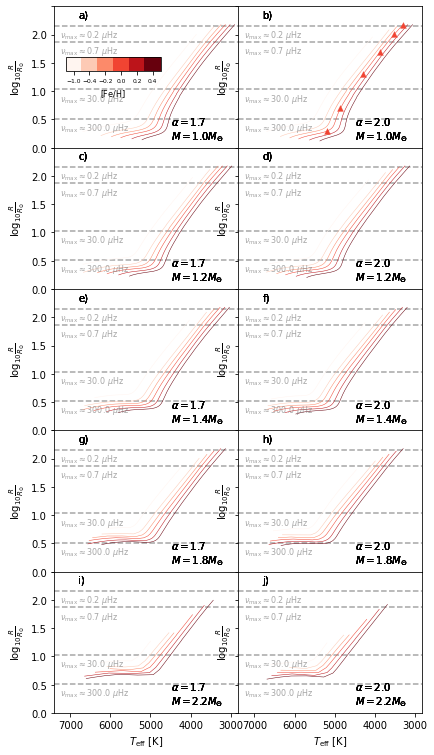

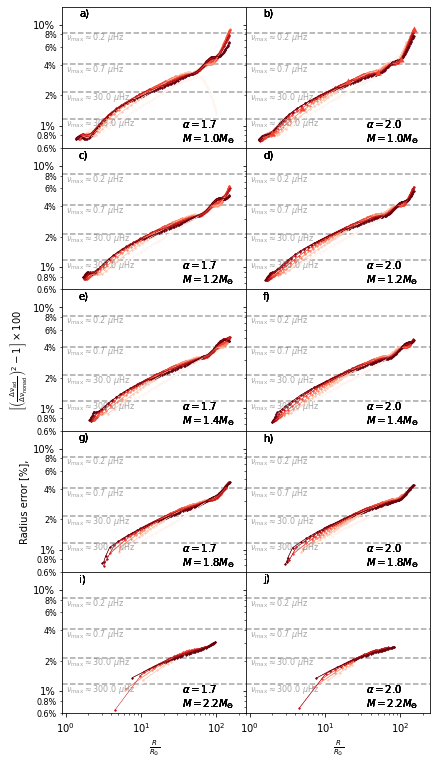

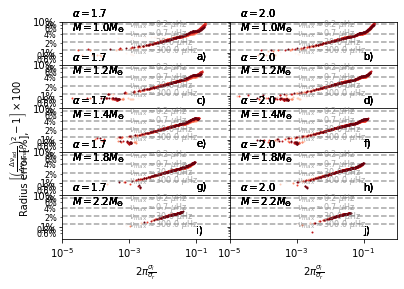

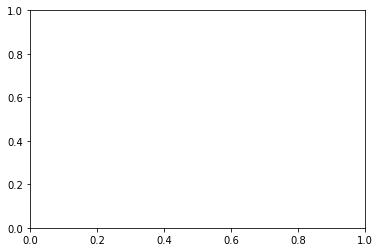

In [35]:


# set to 0 to put everything with damping less than 0 as stable in grey. set to -np.inf
# to turn off coloring the stable modes differently.
damping_thresh = -np.inf
use_eta = True # if False, will show visibility (vis) instead of stability (eta) for the coloring. N/A if damping_thresh = -np.inf

# just make sure everything is up-to-date w.r.t. tess --- copying over the history.data info
# as well as... some freq. data
use_radius = True
import subprocess
# subprocess.call("cd ; ./copy_nonad.sh")
path = '/Users/jzinn/nonad/src/nonad/data/'
index = pd.read_csv(path + "count.index", sep='\s+')
index['feh'] = index['feh'].apply(lambda x : float(x.replace('d', 'e')))
index['alpha'] = pd.to_numeric(index['alpha'])

n_r = 20

# turn on all these to debug
#index = index.loc[index['alpha'] == 1.7] # !!!! debug just for clarity
#index = index.loc[index['mass'] == 1.0] # !!!! debug just for clarity
#cc

#index = index.loc[index['feh'] == -1]

# splitting into grids now insteaed ---- see gs1 def. below
# ax = plt.figure(1).gca()
# ax_gyre = plt.figure(2).gca()
                                                                                
# ratios = [0.2, 0.75, 0.4, 0.04]
# cbaxes = ax.figure.add_axes(ratios)  
# cbaxes_gyre = ax_gyre.figure.add_axes(ratios)            
import matplotlib.gridspec as gridspec 
f1 = plt.figure(1, figsize=(6.6,13)) # figsize of 5,11 for 4 panels.
gs1 = gridspec.GridSpec(5, 2, figure=f1)
gs1.update(wspace=0.0, hspace=0.0)
f2 = plt.figure(2, figsize=(6.6,13)) # no figsize kwarg for 4 panels
gs2 = gridspec.GridSpec(5, 2, figure=f2)
gs2.update(wspace=0.0, hspace=0.0)
f3 = plt.figure(3)
gs3 = gridspec.GridSpec(5, 2, figure=f3)
gs3.update(wspace=0.0, hspace=0.0)




cmap = plt.cm.Reds  # define the colormap                                                                                                                                                                                       
                                                                                                                                 
    # extract all colors from the .jet map                                                                                       
cmaplist = [cmap(i) for i in range(cmap.N)]                                                                                  
    # force the first and last color entry to be grey                                                                            
    #cmaplist[0] = (.5, .5, .5, 0.5)                                                                                              
                                                                              
    # create the new map                                                                                                         
cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)                                         
                                                                                                                                 
    # define the bins and normalize                                                                                              
bounds = [-1.5, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5]   
fehs = np.sort(np.unique(index['feh'].values))
norm = mpl.colors.BoundaryNorm(bounds, cmap.N) 

colors = cmap(norm(index['feh'].values))

# solid for M = 1, dashed for M = 1.2
linestyles = pd.Series(np.array(['-']*len(index), dtype=str))
# linestyles[np.where(index['mass'] == 1.2)[0]] = '--' # !!! uncomment just temp. did this for clarity.


# thick for default mesa alpha of 2 and thin for alpha = 1.7
lw = 3
lw = 1 # undo this ! leave it at 3 !!!
lws = index['alpha']*0 + lw
#lws[(index['alpha'] == 2.0)] = lw*2
nn = 0
done = False
numaxes = np.array([0.2, 0.7, 30, 300])
y_numaxs = numaxes*0
lum_numaxs = numaxes*0
r_numaxs = numaxes*0
print(index)
done_big = [False]*10
done_big2 = [False]*10
done_big3 = [False]*10

def get_inds(count):
    gyre_file = path + 'ad_approx_rad_err_{}.dat'.format(count)
    mesa_file = path + 'history_{}.data'.format(count)
    profile_file = path + 'profiles_{}.index'.format(count)
    mesa = mesa_reader.MesaData(mesa_file)
    gyre = pd.read_csv(gyre_file, sep=',')
    profile = pd.read_csv(profile_file, sep='\s+', skiprows=1, header=None)
    profile.set_index(2, inplace=True)

    
    gyre['model_number'] = profile.loc[gyre['model']][0].values
    gyre.set_index('model_number', inplace=True, drop=True)
    
    ggg = gyre.sort_values(by='model_number')['R']

    #pause()
    # this chooses where the ZAMS according to MESA docs... so just going with that.
    zams = np.where(np.logical_and(-mesa.data('center_h1') + mesa.data('center_h1')[0] > 0.0015, 10.**(mesa.data('log_Lnuc')-mesa.data('log_L'))) > 0.999)[0][1]
    # also only choose things that are below the tip of the giant branch
    tams = np.where(mesa.data('center_h1') < 1e-12)[0][0]
    good = np.where(mesa.data('center_he4')[tams] - 0.01 <= mesa.data('center_he4')[tams:])[0]
    large = np.where(mesa.data('log_R') > np.log10(50.))[0][0]
    good += tams
    inds = np.arange(large,good[-1])

    
#     try:
#         tip =la np.min(np.hstack((np.where(np.diff(mesa.data('log_L')[inds]) < 0)[0], np.where(np.diff(mesa.data('log_Teff')[inds]) > 0)[0])))
#         print(tip)
#         print(good[-1])
#     except:
#         tip = good[-1]
    tip = np.argmin(mesa.data('log_center_T')[tams:])
    #pause()
    if tip == 0:
        tip = good[-1]
    tip = good[-1]
    #tip = len(mesa.data('log_L')) - 1
    inds = remove_dredge_up(mesa.data('log_L')[tams:tip], mesa.data('log_Teff')[tams:tip])
    #inds = np.arange(tams, tip)
    
    inds = np.arange(tams, tip)[inds]
    inds = inds[np.where(10.**(mesa.data('log_Teff')[inds]) < 6700)[0]]
    _gyre = gyre.loc[gyre.index.isin(mesa.data('model_number')[inds])]
    #print(len(gyre.loc[gyre.index.isin(mesa.data('model_number'))]))
    #print(index.loc[index['count'] == count])
    #print(gyre.loc[gyre['model'] == 172])
    _gyre = _gyre.sort_values('R')
    return inds, _gyre, gyre, mesa
 
    

for count, color, linestyle, lw in zip(index['count'], colors, linestyles, lws):
    inds, _gyre, gyre, mesa = get_inds(count)
    print(np.min(_gyre['numax']), count)
    for inn, numax in enumerate(numaxes):
        n_ind = np.where((_gyre['numax'] > numax*0.95)*(_gyre['numax'] < numax*1.05))[0]
        
        if len(n_ind) > 0 and not done and count == 7:
            y_numaxs[inn] = (np.median(_gyre['err'].iloc[n_ind]))
            g_ind = np.where(np.isin(mesa.data('model_number')[inds], _gyre.index.values))[0]

            lum_numaxs[inn] = (np.median(mesa.data('log_L')[inds][g_ind][n_ind]))
            r_numaxs[inn] = ((np.median(mesa.data('log_R')[inds][g_ind][n_ind])))
            if len(np.where(y_numaxs > 0)[0]) == len(numaxes):
                done = True
fdnus = np.empty(shape=(2, 6, n_r))
fdnus = []
errs = []
points = []                
ax_fdnu = plt.figure(20).gca()
print(index['count'])
print(len(index.loc[index['alpha'] == 2.0]))
print(len(index.loc[index['alpha'] == 1.7]))
twice = False
for count, color, linestyle, lw in zip(index['count'], colors, linestyles, lws):
    
    ylabel2 = False
    ylabell = False
    # print(index.loc[index['count'] == count, 'alpha'])
    if index.loc[index['count'] == count, 'alpha'].values[0] == 1.7 and index.loc[index['count'] == count, 'mass'].values[0] == 1.0:
        label = r'$\alpha = 1.7$' + '\n' +  r'$M = 1.0 M_{\odot}$'
        ax = f1.add_subplot(gs1[0, 0])
        ax_gyre = f2.add_subplot(gs2[0, 0]) 
        ax_other = f3.add_subplot(gs3[0, 0])
        figlabel = 'a)'
        ylabel = True
        ylabell = False
        xlabel = False
        indd = 0
    if index.loc[index['count'] == count, 'alpha'].values[0] == 2.0 and index.loc[index['count'] == count, 'mass'].values[0] == 1.0:
        label = r'$\alpha = 2.0$' + '\n' + r'$M = 1.0 M_{\odot}$'
        ax = f1.add_subplot(gs1[0, 1])
        ax_gyre = f2.add_subplot(gs2[0, 1])
        ax_other = f3.add_subplot(gs3[0, 1])
        figlabel = 'b)'
        ylabel = False
        xlabel = False
        indd = 1
    if index.loc[index['count'] == count, 'alpha'].values[0] == 1.7 and index.loc[index['count'] == count, 'mass'].values[0] == 1.2:
        label = r'$\alpha = 1.7$' + '\n' + r'$M = 1.2 M_{\odot}$'
        ax = f1.add_subplot(gs1[1, 0])
        ax_gyre = f2.add_subplot(gs2[1, 0]) 
        ax_other = f3.add_subplot(gs3[1, 0])
        figlabel = 'c)'
        ylabel = True
        ylabel2 = False
        xlabel = False
        ylabell = False
        indd = 2
        
    if index.loc[index['count'] == count, 'alpha'].values[0] == 2.0 and index.loc[index['count'] == count, 'mass'].values[0] == 1.2:
        label = r'$\alpha = 2.0$' + '\n' + r'$M = 1.2 M_{\odot}$'
        ax = f1.add_subplot(gs1[1, 1])
        ax_gyre = f2.add_subplot(gs2[1, 1]) 
        ax_other = f3.add_subplot(gs3[1, 1])
        figlabel = 'd)'
        ylabel = False
        xlabel = False
        indd = 3
    
    if index.loc[index['count'] == count, 'alpha'].values[0] == 1.7 and index.loc[index['count'] == count, 'mass'].values[0] == 1.4:
        label = r'$\alpha = 1.7$' + '\n' + r'$M = 1.4 M_{\odot}$'
        ax = f1.add_subplot(gs1[2, 0])
        ax_gyre = f2.add_subplot(gs2[2, 0]) 
        ax_other = f3.add_subplot(gs3[2, 0])
        figlabel = 'e)'
        ylabel = True
        ylabell = True
        xlabel = False
        indd = 4
        
    if index.loc[index['count'] == count, 'alpha'].values[0] == 1.7 and index.loc[index['count'] == count, 'mass'].values[0] == 1.8:
        label = r'$\alpha = 1.7$' + '\n' + r'$M = 1.8 M_{\odot}$'
        ax = f1.add_subplot(gs1[3, 0])
        ax_gyre = f2.add_subplot(gs2[3, 0]) 
        ax_other = f3.add_subplot(gs3[3, 0])
        figlabel = 'g)'
        ylabel = True
        xlabel = False
        ylabel2 = True
        indd = 5
    
    if index.loc[index['count'] == count, 'alpha'].values[0] == 1.7 and index.loc[index['count'] == count, 'mass'].values[0] == 2.2:
        label = r'$\alpha = 1.7$' + '\n' + r'$M = 2.2 M_{\odot}$'
        ax = f1.add_subplot(gs1[4, 0])
        ax_gyre = f2.add_subplot(gs2[4, 0]) 
        ax_other = f3.add_subplot(gs3[4, 0])
        figlabel = 'i)'
        ylabel = True
        ylabell = False
        ylabel2 = False
        xlabel = True
        indd = 6
        
    if index.loc[index['count'] == count, 'alpha'].values[0] == 2.0 and index.loc[index['count'] == count, 'mass'].values[0] == 1.4:
        label = r'$\alpha = 2.0$' + '\n' + r'$M = 1.4 M_{\odot}$'
        ax = f1.add_subplot(gs1[2, 1])
        ax_gyre = f2.add_subplot(gs2[2, 1]) 
        ax_other = f3.add_subplot(gs3[2, 1])
        figlabel = 'f)'
        ylabel = False
        xlabel = False
        indd = 7
        
    if index.loc[index['count'] == count, 'alpha'].values[0] == 2.0 and index.loc[index['count'] == count, 'mass'].values[0] == 1.8:
        label = r'$\alpha = 2.0$' + '\n' + r'$M = 1.8 M_{\odot}$'
        ax = f1.add_subplot(gs1[3, 1])
        ax_gyre = f2.add_subplot(gs2[3, 1]) 
        ax_other = f3.add_subplot(gs3[3, 1])
        figlabel = 'h)'
        ylabel = False
        xlabel = False
        indd = 8
        
    if index.loc[index['count'] == count, 'alpha'].values[0] == 2.0 and index.loc[index['count'] == count, 'mass'].values[0] == 2.2:
        label = r'$\alpha = 2.0$' + '\n' + r'$M = 2.2 M_{\odot}$'
        ax = f1.add_subplot(gs1[4, 1])
        ax_gyre = f2.add_subplot(gs2[4, 1]) 
        ax_other = f3.add_subplot(gs3[4, 1])
        figlabel = 'j)'
        ylabel = False
        xlabel = True
        indd = 9

    if indd == 1:
        #if twice:
        #   ggg
        twice = True
        
    inds, _gyre, gyre, mesa = get_inds(count)
    if len(np.unique(inds)) != len(inds):
        ggg
    if True:               
 
        
        #inds = np.arange(tams, tip)
        if use_radius:
            heatmap = ax.plot(10.**(mesa.data('log_Teff')[inds]), mesa.data('log_R')[inds], lw=0.5*lw, linestyle=linestyle, color=color)
        else:
            heatmap = ax.plot(10.**(mesa.data('log_Teff')[inds]), mesa.data('log_L')[inds], lw=0.5*lw, linestyle=linestyle, color=color)
        
    
    #heatmap = ax.scatter(10.**(mesa.data('log_Teff')[inds]), mesa.data('R')[inds], s=1,c=color)
    #g_ind = np.where(np.isin(mesa.data('model_number')[inds], gyre.loc[gyre['err'] < 0.6].index.values))[0]
    #print(gyre.loc[gyre.index.isin(mesa.data('model_number')[inds][g_ind])])
    #heatmap = ax.scatter(10.**(mesa.data('log_Teff')[inds][g_ind]), mesa.data('R')[inds][g_ind], s=1,c='red')

    
    

    ax_gyre.text(35, 0.7, label)

    ax_gyre.text(1.5, 12, figlabel) # 100, 0.6 for 4 panels
    ax_other.text(2*1e-5, 5.0, label)
    ax_other.text(0.1, 0.6, figlabel)
    if use_radius:
        ax.text(4500, 0.15, label)
        ax.text(6800, 2.3, figlabel)
    else:
        ax.text(4500, 0.4, label)
        ax.text(6800, 5, figlabel)
    plot_special = False
    if index.loc[index['count'] == count, 'mass'].values[0] == 1.0 and index.loc[index['count'] == count, 'feh'].values[0] == 0.0 and index.loc[index['count'] == count, 'alpha'].values[0] == 2.0:
#         print(index.loc[index['count'] == count])
#         print('feh = 0 radii and errs:')
        rs = [2, 5, 20, 50, 100, 150]
        iinds = []
        for r in rs:
            iinds.append(_gyre.iloc[np.argmin(np.abs(_gyre['R'] - r))].name)
        plot_special = True
        
    
    heatmap_gyre = ax_gyre.scatter(_gyre['R'], _gyre['err'], color=color, s=lw)
    
    if use_eta:
        color_field = 'eta'
    else:
        color_field = 'inertia2'
        _gyre[color_field] = _gyre['inertia']**(-2)
        print(_gyre[color_field])
        
        _gyre[color_field] -= 1e5 
    unstable = _gyre[color_field] < 0.0
    #print(_gyre.loc[unstable])
    # plotting on the other side of the y-axis the eta
    #ax2 = ax_gyre.twinx()
    # eta2 is eta from dupret+2009
    #ax2.scatter(_gyre['R'], (_gyre['eta2']), color=color)
    #ax2.set_ylim([1e-9, 1e-5])
    #ax2.scatter(_gyre['R'], (1./_gyre['eta2']/_gyre['inertia']), color=color)
    #ax2.set_ylim([1e0, 1e6])
    #ax2.scatter(_gyre['R'], np.abs(_gyre['inertia']), color=color)
    #ax2.set_ylim([1e-6, 1e0])
#     ax2.scatter(_gyre['R'], (_gyre['sigir']), color=color)
#     ax2.set_ylim([1e-6, 1e0])
#     ax2.set_yscale('log')
    
#     ax2 = ax_gyre.twiny()
#     ax2.scatter(_gyre['sigir'], (_gyre['err']), color=color)
#     ax2.set_xlim([1e-6, 1e0])
#     ax2.set_xscale('log')

    
    ax_other.scatter(2.*np.pi*_gyre['sigir'].loc[~unstable], _gyre['err'].loc[~unstable], color=color, s=lw)

    if plot_special:
        heatmap_gyre = ax_gyre.scatter(_gyre.loc[iinds,'R'], _gyre.loc[iinds, 'err'], color=color, lw=lw*0.1, marker='^', zorder=1e11)
        g_ind = np.where(np.isin(mesa.data('model_number')[inds], _gyre.loc[iinds].index.values))[0]
        if use_radius:
            ax.scatter(10.**(mesa.data('log_Teff')[inds][g_ind]), mesa.data('log_R')[inds][g_ind], lw=lw*0.25,color=color, marker='^', zorder=1e11)
        else:
            ax.scatter(10.**(mesa.data('log_Teff')[inds][g_ind]), mesa.data('log_L')[inds][g_ind], lw=lw*0.25,color=color, marker='^', zorder=1e11)



            
    heatmap_gyre = ax_gyre.plot(_gyre['R'], _gyre['err'], color=color, lw=lw*0.5, linestyle=linestyle)
    eta = _gyre[color_field].iloc[0]
    count_eta = 0
    old_count_eta = 0
    while count_eta < len(_gyre):
        while eta*_gyre[color_field].iloc[count_eta] >= 0 :
            eta = _gyre[color_field].iloc[count_eta]
            
            
            count_eta += 1
            if count_eta == len(_gyre)-1: 
                break

        eta = _gyre[color_field].iloc[count_eta]
        
        if _gyre[color_field].iloc[count_eta-1] <= damping_thresh:
            color_eta = 'grey'
        else:
            color_eta = color 
        if count_eta == len(_gyre)-1:
            count_eta += 1
        
        ax_gyre.scatter(_gyre['R'].iloc[old_count_eta:count_eta], _gyre['err'].iloc[old_count_eta:count_eta], color=color_eta, s=lw)
        ax_gyre.plot(_gyre['R'].iloc[old_count_eta:count_eta], _gyre['err'].iloc[old_count_eta:count_eta], color=color_eta, lw=0.5*lw, linestyle=linestyle)
        g_ind = np.where(np.isin(mesa.data('model_number')[inds], _gyre.index.values))[0]
        if color_eta == 'grey':
            if use_radius:
                heatmap = ax.plot(10.**(mesa.data('log_Teff')[inds][g_ind][old_count_eta:count_eta]), mesa.data('log_R')[inds][g_ind][old_count_eta:count_eta], lw=lw,c=color_eta, linestyle=linestyle)
            else:
                heatmap = ax.plot(10.**(mesa.data('log_Teff')[inds][g_ind][old_count_eta:count_eta]), mesa.data('log_L')[inds][g_ind][old_count_eta:count_eta], lw=lw,c=color_eta, linestyle=linestyle)

        old_count_eta = count_eta
        count_eta += 1

        print('done ')
        print(indd)
        print(done_big2[indd])
        # uncomment these to plot the fdnu
        #ax_fdnu.scatter(np.log10(rr), 1./(dnu_scal/_gyre['dnu_obs']))
        #ax_fdnu.set_ylim([0.95, 1.05])
        # # ax_fdnu.scatter(teff, 1./(dnu_scal/_gyre['dnu_obs']))
        # # ax_fdnu.set_xlim([7000,3000])
        #ax_fdnu.figure.savefig('fdnu.png', format='png', dpi=2000)
        #ggg
        
    # try to make an interpolating functino to do fdnu corrections
    # !!! would need to change shape of grid if changed the number of feh or mass
    # the last dimension is radius, and if want something other than linear interp, may want to increase the number of points in that dimension
    # since there is some shape in teh radius dimension (see the ad error plot as a functino of radius)
 

    from scipy import interpolate
    from scipy.interpolate import LinearNDInterpolator, NearestNDInterpolator
    use_rad = False
    if use_rad:
        rads = np.logspace(0.0, np.log10(150), n_r)
    else:
        rads = np.logspace(np.log(np.min(_gyre['numax'])), np.log(np.max(_gyre['numax'])), n_r)
    feh_inds = {-1:0, -0.4:1, -0.2:2, 0.0:3, 0.2:4, 0.4:5}
    
    alpha_grid = 1.7 # or 2.0
    if index.loc[index['count'] == count, 'alpha'].values[0] == alpha_grid:
        dnu_sun = 135.146
        dnu_scal = np.sqrt(mesa.data('star_mass')[inds][0]/_gyre['R']**3)*dnu_sun
        print(mesa.data('star_mass')[inds])
        _gyre['fdnu'] = 1./(dnu_scal/_gyre['dnu_obs'])
        print(indd)
        mass = index.loc[index['count'] == count, 'mass'].values[0]
        feh_ind = feh_inds[index.loc[index['count'] == count, 'feh'].values[0]]
        if use_rad:
            m = _gyre['fdnu'].iloc[np.argmin(_gyre['R'] )]
            ma = _gyre['fdnu'].iloc[np.argmax(_gyre['R'] )]
            radius_interp = interpolate.interp1d(np.log10(_gyre['R']), _gyre['fdnu'], bounds_error=False, fill_value=(m,ma))
            _fdnus = radius_interp(np.log10(rads))
            m = _gyre['err'].iloc[np.argmin(_gyre['R'] )]
            ma = _gyre['err'].iloc[np.argmax(_gyre['R'] )]
            radius_interp = interpolate.interp1d(np.log10(_gyre['R']), _gyre['err'], bounds_error=False, fill_value=(m,ma))
            _errs = radius_interp(np.log10(rads))

            fdnus += list(_fdnus)
            errs += list(_errs)
        
            points += [(mass, index.loc[index['count'] == count, 'feh'].values[0], np.log10(r)) for r in rads]
        else:
            m = _gyre['fdnu'].iloc[np.argmin(_gyre['numax'] )]
            ma = _gyre['fdnu'].iloc[np.argmax(_gyre['numax'] )]
            radius_interp = interpolate.interp1d(np.log(_gyre['numax']), _gyre['fdnu'], bounds_error=False, fill_value=(m,ma))
            _fdnus = radius_interp(np.log(rads))
            m = _gyre['err'].iloc[np.argmin(_gyre['numax'] )]
            ma = _gyre['err'].iloc[np.argmax(_gyre['numax'] )]
            radius_interp = interpolate.interp1d(np.log(_gyre['numax']), _gyre['err'], bounds_error=False, fill_value=(m,ma))
            _errs = radius_interp(np.log(rads))

            fdnus += list(_fdnus)
            errs += list(_errs)
        
            points += [(mass, index.loc[index['count'] == count, 'feh'].values[0], np.log(r)) for r in rads]            
        # changing this to ln numax instead of log radius
        # points += [(mass, index.loc[index['count'] == count, 'feh'].values[0], np.log(numax)) for r in numaxs]
    # there is too much spread in metallicity to put on numax == 10 and 100 in the gyre plot at least.
        


    if not done_big[indd]:
        done_big[indd] = True
        for lum_numax, r_numax, y_numax, numax in zip(lum_numaxs, r_numaxs, y_numaxs, numaxes): 
            alpha1 = 0.7
            alpha2 = 0.7
            if True:
            
                ax_gyre.text(1, y_numax*0.85, r'$\nu_{{\mathrm{{max}}}} \approx${:3.1f} $\mu\mathrm{{Hz}}$'.format(numax), color='grey', alpha=alpha1, fontsize=8)
                if use_radius:
                    ax.text(7250, r_numax-0.2, r'$\nu_{{\mathrm{{max}}}}  \approx${:3.1f} $\mu\mathrm{{Hz}}$'.format(numax), color='grey', alpha=alpha1, fontsize=8)
                else:
                    ax.text(7250, lum_numax-0.2, r'$\nu_{{\mathrm{{max}}}}  \approx${:3.1f} $\mu\mathrm{{Hz}}$'.format(numax), color='grey', alpha=alpha1, fontsize=8)
                ax_other.text(1e-3, y_numax*0.85, r'$\nu_{{\mathrm{{max}}}}  \approx${:3.1f} $\mu\mathrm{{Hz}}$'.format(numax), color='grey', alpha=alpha1, fontsize=8)
            if use_radius:
                ax.axhline(r_numax, linestyle='dashed', color='grey', zorder=1e-11, alpha=alpha2)
            else:
                ax.axhline(lum_numax, linestyle='dashed', color='grey', zorder=1e-11, alpha=alpha2)

            ax_other.axhline(y_numax, linestyle='dashed', color='grey', zorder=1e-11, alpha=alpha2)
            ax_gyre.axhline(y_numax, linestyle='dashed', color='grey', zorder=1e-11, alpha=alpha2)
    #print(_gyre)
    #print(_gyre.iloc[np.argmin(np.abs(_gyre['R'] - 9.46e1))])
    #print(_gyre.iloc[np.argmin(np.abs(_gyre['R'] - 5.78e1))])
    #print(_gyre.iloc[np.argmin(np.abs(_gyre['model'] - 190))])
    # now also plot up the TACHeB -> R = 150
    big = len(mesa.data('log_L'))-1
    try:
        tacheb = np.where(mesa.data('center_he4') < 1e-4)[0][0]
    except:
        tacheb = big
    if big == tacheb:
        #pause()
        pass
    if big > tacheb:
        
        inds = remove_dredge_up(mesa.data('log_L')[tacheb:big], mesa.data('log_Teff')[tacheb:big])
        inds = np.arange(tacheb, big)[inds]
        
        #heatmap = ax.plot(10.**(mesa.data('log_Teff')[inds]), mesa.data('log_L')[inds], lw=lw, linestyle=linestyle, color=color)
        #ax.scatter(10.**(mesa.data('log_Teff')[inds[0]]), mesa.data('log_L')[inds[0]], marker='*', s=5, color='black')
        #ax.scatter(10.**(mesa.data('log_Teff')[inds[0]]), mesa.data('log_center_T')[inds[0]], marker='*', s=5, color='black')

        _gyre = gyre.loc[gyre.index.isin(mesa.data('model_number')[inds])]
        _gyre = _gyre.sort_values('R')
        #ax_gyre.scatter(_gyre['R'].iloc[0], _gyre['err'].iloc[0], marker='*', s=5, color='black')
        #heatmap_gyre = ax_gyre.scatter(_gyre['R'], _gyre['err'], color=color, s=lw)
        #heatmap_gyre = ax_gyre.plot(_gyre['R'], _gyre['err'], color=color, lw=lw*0.5, linestyle=linestyle)
    yticks = ax.yaxis.get_major_ticks()

    yticks[-1].label1.set_visible(False)
    if xlabel:
        ax.set_xlabel(r'$T_{\mathrm{eff}}\mathrm{\ [K]}$')
        ax_gyre.set_xlabel(r'$\frac{R}{R_{\odot}}$')
        ax_other.set_xlabel(r'$2\pi\frac{\sigma_i}{\sigma_r}$')
    else:
        xticks = ax.xaxis.get_major_ticks()
        for xtick in xticks:
            xtick.label1.set_visible(False)
        xticks = ax_gyre.xaxis.get_major_ticks()
        for xtick in xticks:
            xtick.label1.set_visible(False)
        xticks = ax_other.xaxis.get_major_ticks()
        for xtick in xticks:
            xtick.label1.set_visible(False)
    #if nn == 0:
        #ax_gyre.figure.legend(loc='upper left')
        #ax_other.figure.legend(loc='upper left')
        #ax.figure.legend(loc='upper left')
    if ylabel2:
        ax_gyre.set_ylabel(r'Radius error [%],')
        ax_other.set_ylabel(r'Radius error [%],')
        
    if use_radius:
        ax.set_ylabel(r'$\log_{10} \frac{R}{R_{\odot}}$')
    else:
        ax.set_ylabel(r'$\log_{10} \frac{L}{L_{\odot}}$')
    if ylabell:

        if not ylabel2:
            ax_gyre.set_ylabel(r'$\mathrm{\left[\left(\frac{\Delta \nu_{ad}}{\Delta \nu_{nonad}}\right)^2 -1\right]\times 100}$')
            ax_other.set_ylabel(r'$\mathrm{\left[\left(\frac{\Delta \nu_{ad}}{\Delta \nu_{nonad}}\right)^2 -1\right]\times 100}$')
    
    if not ylabel:
        yticks = ax.yaxis.get_major_ticks()
        for ytick in yticks:
            ytick.label1.set_visible(False)
        yticks = ax_gyre.yaxis.get_major_ticks()
        for ytick in yticks:
            ytick.label1.set_visible(False)
        yticks = ax_other.yaxis.get_major_ticks()
        for ytick in yticks:
            ytick.label1.set_visible(False)
    #ratios = [0.15, 0.75, 0.22, 0.03] these are the ratios for 4 panels
    ratios = [0.15, 0.811, 0.2, 0.015] 
    cbaxes = ax.figure.add_axes(ratios)  
    #cbaxes_gyre = ax_gyre.figure.add_axes(ratios) 
    if count == 0:
        cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ticks=fehs, orientation='horizontal', cax=cbaxes) 
        #cbar_gyre = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ticks=fehs, orientation='horizontal', cax=cbaxes_gyre) 
        clabel = r'$\mathrm{[Fe/H]}$'
        cbar.set_label(r''+clabel, weight='bold', fontsize=8) 
        #cbar_gyre.set_label(r''+clabel, weight='bold', fontsize=10)
        cbaxes.tick_params(which='major',labelsize=6)
        #cbaxes_gyre.tick_params(which='major',labelsize=8)
    # removed this and added the log-scale
    #ax.set_yscale('log')
    ax_gyre.set_yscale('log')
    if use_radius:
        ax.set_ylim([0, 2.5])
    else:
        ax.set_ylim([0, 3.5])
    ax.set_xlim([7000, None])

    ax_gyre.set_xscale('log')
    ax_gyre.set_xlim([0.9, 250])
    ax_gyre.set_ylim([0.6, 15])
    ax_other.set_xlim([1e-5, 1e0])
    ax_other.set_ylim([0.4, 10])
    ax_other.set_xscale('log')
    ax_other.set_yscale('log')
    
    ax.set_xlim(10.**(np.array([3.87, 3.45])))
    if ylabel:
        ax_gyre.set_yticks([1, 10])
        ax_gyre.set_yticklabels(['1%', '10%'])
        ax_gyre.set_yticks([0.6, 0.8, 2, 4, 6, 8], minor=True)
        ax_gyre.set_yticklabels(['0.6%', '0.8%', '2%', '4%', '6%', '8%'], minor=True, fontsize=8)
        ax_other.set_yticks([1, 10])
        ax_other.set_yticklabels(['1%', '10%'])
        ax_other.set_yticks([0.6, 0.8, 2, 4, 6, 8], minor=True)
        ax_other.set_yticklabels(['0.6%', '0.8%', '2%', '4%', '6%', '8%'], minor=True, fontsize=8)
    nn += 1   
masses = [1.0, 1.2]
#fdnus_interp = LinearNDInterpolator(np.meshgrid(masses, fehs, np.log10(rads)), fdnus)
print(points)
print(fdnus)
fdnus_interp = LinearNDInterpolator(points, fdnus, rescale=True)

errs_interp = LinearNDInterpolator(points, errs, rescale=True)

#fdnusn_interp = LinearNDInterpolator(points, fdnusn)
#n = fdnusn_interp([1.2]*len(rads), [0.0]*len(rads), np.log10(rads))
a = fdnus_interp([1.2]*len(rads), [0.0]*len(rads), np.log(rads))
b = errs_interp([1.2]*len(rads), [0.0]*len(rads), np.log(rads))
print(b)
import pickle
al = 'alpha1p7'*(alpha_grid == 1.7) + ''
f = open('fdnu_int'+al+'.pckl', 'wb')
pickle.dump((fdnus_interp, errs_interp), f)
f.close()
print(points)
print(fdnus)
print(errs)
print(np.max(points))
print(np.max(fdnus))
print(np.min(points))
print(np.min(fdnus))

fdnus_interp = NearestNDInterpolator(points, fdnus, rescale=True)

errs_interp = NearestNDInterpolator(points, errs, rescale=True)

#fdnusn_interp = LinearNDInterpolator(points, fdnusn)
#n = fdnusn_interp([1.2]*len(rads), [0.0]*len(rads), np.log10(rads))
a = fdnus_interp([1.2]*len(rads), [0.0]*len(rads), np.log(rads))
b = errs_interp([1.2]*len(rads), [0.0]*len(rads), np.log(rads))
print(b)
import pickle
f = open('fdnu_int_nearest'+al+'.pckl', 'wb')
pickle.dump((fdnus_interp, errs_interp), f)
f.close()

#ax_gyre.plot(rads, a)
#ax_gyre.plot(rads, b)
        
        


#plt.show()
if damping_thresh > -np.inf:
    if use_eta:
        ext = '_w_damping'
    else:
        ext = '_w_vis'
else:
    ext = ''
ax.figure.savefig('hr'+ext+'.png', format='png',dpi=1000)
ax_gyre.figure.savefig('gyre'+ext+'.png', format='png',dpi=1000)
ax_other.figure.savefig('other'+ext+'.png', format='png', dpi=1000)



